In [1]:
import numpy as np
import matplotlib
np.random.seed(123)  # for reproducibility
%matplotlib inline


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
from keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape)

(60000, 28, 28)


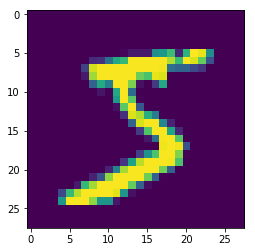

In [5]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])

In [6]:
X_train.shape[0]

60000

In [7]:
X_train = X_train.reshape(X_train.shape[0], 28, 28 , 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28 , 1)

In [8]:
X_train.shape

(60000, 28, 28, 1)

In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [10]:
y_train.shape

(60000,)

In [11]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [12]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)


In [13]:
Y_train[0:3]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

In [14]:
model = Sequential()

In [15]:
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))


/home/ubuntu/anaconda2/envs/spell/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  if __name__ == '__main__':


In [16]:
model.output_shape

(None, 26, 26, 32)

In [17]:
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

/home/ubuntu/anaconda2/envs/spell/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if __name__ == '__main__':


In [18]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [20]:
model.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=10, verbose=1)


/home/ubuntu/anaconda2/envs/spell/lib/python3.5/site-packages/keras/models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 38s - loss: 0.2046 - acc: 0.9374    
Epoch 2/10
60000/60000 [==============================] - 15s - loss: 0.0874 - acc: 0.9736    
Epoch 3/10
60000/60000 [==============================] - 15s - loss: 0.0680 - acc: 0.9791    
Epoch 4/10
60000/60000 [==============================] - 15s - loss: 0.0565 - acc: 0.9829    
Epoch 5/10
60000/60000 [==============================] - 15s - loss: 0.0479 - acc: 0.9857    
Epoch 6/10
60000/60000 [==============================] - 15s - loss: 0.0426 - acc: 0.9866    
Epoch 7/10
60000/60000 [==============================] - 15s - loss: 0.0391 - acc: 0.9876    
Epoch 8/10
60000/60000 [==============================] - 15s - loss: 0.0359 - acc: 0.9884    
Epoch 9/10
60000/60000 [==============================] - 15s - loss: 0.0334 - acc: 0.9901    
Epoch 10/10
60000/60000 [==============================] - 15s - loss: 0.0300 - acc: 0.9902    


In [21]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [22]:
score

[0.035027671322182048, 0.99019999999999997]